# Ch3. 신경망
## 3.2 활성화 함수
### 3.2.2 계단 함수 구현하기

In [8]:
def step_function(x):
    y = x > 0  # inequality operation on numpy array produces boolean array against each elements
    return y.astype(int)

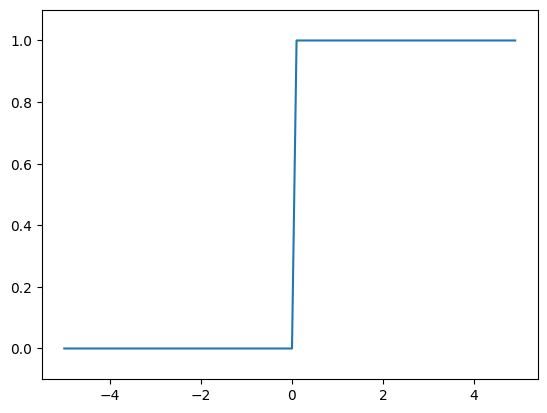

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-5.0, 5.0, 0.1)
Y1 = step_function(X)
plt.plot(X, Y1)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

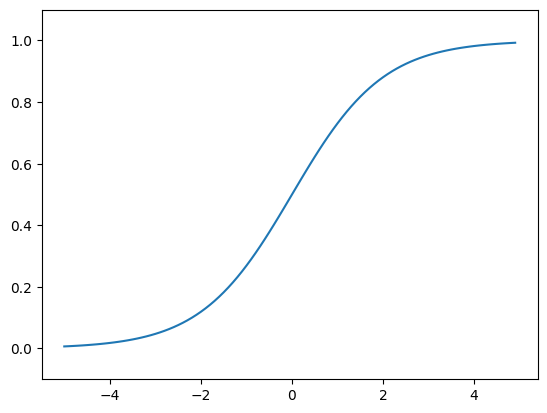

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y2 = sigmoid(X)
plt.plot(X, Y2)
plt.ylim(-0.1, 1.1)
plt.show()

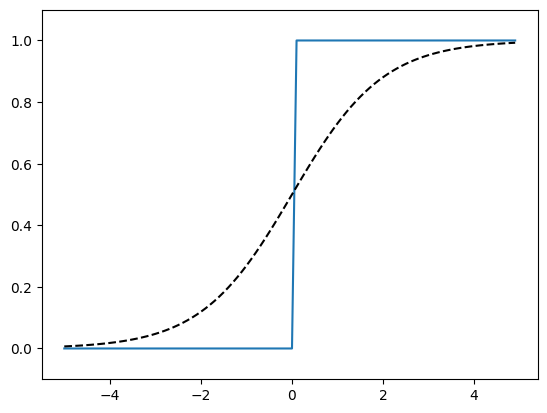

In [11]:
plt.plot(X, Y1)
plt.plot(X, Y2, 'k--')
plt.ylim(-0.1, 1.1) # set range of y-axis
plt.show()

### 3.2.7 ReLU 함수

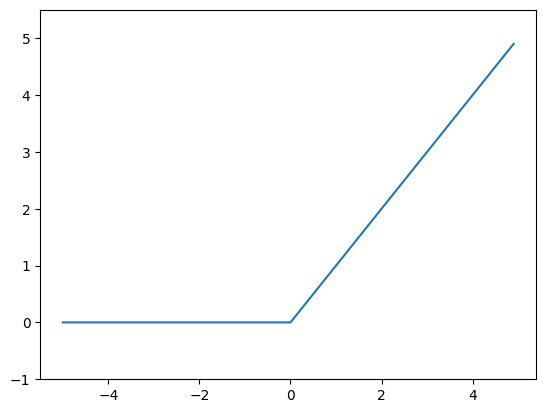

In [12]:
def relu(x):
    return np.maximum(0, x)

y = relu(X)
plt.plot(X,y)
plt.ylim(-1.0, 5.5)
plt.show()

## 3.3 다차원 배열의 계산
### 3.3.2 행렬의 곱
| ![fig 3-12.png](https://github.com/user-attachments/assets/43336981-febf-4643-b463-d9c383b74f07) |
|:----------------------------------------:|
|             행렬의 곱에서 대응하는 차원의 원소 수를 일치시켜야 한다                   |

In [13]:
import numpy as np
A = np.array([1,2,3,4])
print(f"A dimension: {np.ndim(A)}") # check array dimension
print(f"A shape: {A.shape}")

B = np.array([[1,2],[3,4],[5,6]])
print(f"B dimension: {np.ndim(B)}")
print(f"B shape: {B.shape}")
np.dot(A,B) # dot product only works when the dimension matches

A dimension: 1
A shape: (4,)
B dimension: 2
B shape: (3, 2)


ValueError: shapes (4,) and (3,2) not aligned: 4 (dim 0) != 3 (dim 0)

In [14]:
A = np.array([[1,2],[3,4]])
print(f"A shape: {A.shape}")

B = np.array([[5,6],[7,8]])
print(f"B shape: {B.shape}")
print(np.dot(A,B))

A shape: (2, 2)
B shape: (2, 2)
[[19 22]
 [43 50]]


### 3.3.3 신경망에서의 행렬 곱
| ![fig 3-14.png](https://github.com/user-attachments/assets/9f2c72d1-da12-4860-b609-c4246205d59d) |
|:----------------------------------------:|
| 행렬의 곱으로 신경망 계산 수행 |

In [15]:
X = np.array([1,2])
print(f"X matrix: {X}")
print(f"X shape: {X.shape}")
W = np.array([[1,3,5],[2,4,6]])
print(f"W matrix: {W}")
print(f"W shape: {W.shape}")
Y = np.dot(X,W)
print(f"Y matrix: {Y}")

X matrix: [1 2]
X shape: (2,)
W matrix: [[1 3 5]
 [2 4 6]]
W shape: (2, 3)
Y matrix: [ 5 11 17]


## 3.4 3층 신경망 구현하기
### 3.4.1 표기법
| ![fig 3-16.png](https://github.com/user-attachments/assets/6d506b77-61c0-46c1-8983-2716d31f668a) |
|:----------------------------------------:|
| 표기법 |
### 3.4.2 신호 전달 구현
| ![fig 3-17.png](https://github.com/user-attachments/assets/ec189e57-5249-459b-923b-49f782e56231) |![fig 3-18.png](https://github.com/user-attachments/assets/34ccee62-3a49-4d3a-becc-5db2604e46d9)|
|:----------------------------------------:|:----------------------------------------:|
| 입력층 > 1층 | 입력층 > 1층 |
| ![fig 3-19.png](https://github.com/user-attachments/assets/a67e1e37-3624-408f-ab5e-1e3dc18eb285) |![fig 3-20.png](https://github.com/user-attachments/assets/21ac1208-deb3-45fa-860b-30f0b2f4e296)|
| 1층 > 2층 | 2층 > 출력층|

In [16]:
# input > 1st layer
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(f"W1 shape: {W1.shape}")
print(f"X shape: {X.shape}")
print(f"B1 shape: {B1.shape}")

A1 = np.dot(X, W1) + B1
print(f"A1: {A1}")

Z1 = sigmoid(A1)
print(f"Z1: {Z1}")

W1 shape: (2, 3)
X shape: (2,)
B1 shape: (3,)
A1: [0.3 0.7 1.1]
Z1: [0.57444252 0.66818777 0.75026011]


In [17]:
# 1st layer > 2nd layer
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(f"Z1 shape: {Z1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"B2 shape: {B2.shape}")

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(f"A2: {A2}")
print(f"Z2: {Z2}")

Z1 shape: (3,)
W2 shape: (3, 2)
B2 shape: (2,)
A2: [0.51615984 1.21402696]
Z2: [0.62624937 0.7710107 ]


In [18]:
# 2nd layer > output
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(f"A3: {A1}")
print(f"Y: {Z1}")

A3: [0.3 0.7 1.1]
Y: [0.57444252 0.66818777 0.75026011]


In [19]:
# overall
def init_network(): # initialize weight and bias
    network = {} # weight and bias values dictionary for each layer
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계
### 3.5.1 항등 함수 소프트맥스 함수 구현
| ![fig 3-21.png](https://github.com/user-attachments/assets/56bbcd0c-2ede-49f2-9449-5d46a1c6b9be) | ![e 3.10.png](https://github.com/user-attachments/assets/e487cd0e-6445-4383-923d-30d718c4e87e) ![fig 3-22.png](https://github.com/user-attachments/assets/65a101eb-1e36-4033-baa8-ddb6c77b9482)|
|:----------------------------------------:|:----------------------------------------:|
| 항등 함수(identity function) | 소프트맥스 함수(softmax function) |

In [20]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(f"exp array: {exp_a}")
sum_exp_a = np.sum(exp_a)
print(f"sum of exp values: {sum_exp_a}")
y = exp_a / sum_exp_a
print(f"y array: {y}")

exp array: [ 1.34985881 18.17414537 54.59815003]
sum of exp values: 74.1221542101633
y array: [0.01821127 0.24519181 0.73659691]


In [21]:
def softmax(a): # define softmax function
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2 소프트맥스 함수 개선
지수 함수는 쉽게 큰 값을 만들기 때문에 오버플로 문제가 있기 때문에 소프트맥스 함수를 개선하여 사용할 수 있다.
| ![e 3.11.png](https://github.com/user-attachments/assets/3ff857d9-8ff1-4af3-a611-fbaab0bef147) |
|:----------------------------------------:|
| 개선된 소프트맥스 함수 수식 |

In [22]:
a = np.array([1010, 1000, 990])
print(f"softmax: {np.exp(a) / np.sum(np.exp(a))}")

softmax: [nan nan nan]


C:\Users\BLUESKY\AppData\Local\Temp\ipykernel_14288\2276578761.py:2: RuntimeWarning: overflow encountered in exp
  print(f"softmax: {np.exp(a) / np.sum(np.exp(a))}")
C:\Users\BLUESKY\AppData\Local\Temp\ipykernel_14288\2276578761.py:2: RuntimeWarning: invalid value encountered in divide
  print(f"softmax: {np.exp(a) / np.sum(np.exp(a))}")


In [23]:
c = np.max(a)
print(f"softmax: {np.exp(a - c) / np.sum(np.exp(a - c))}")

softmax: [9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [24]:
def improved_softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수 특징

In [25]:
def softmax(a): # define softmax function
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(f"softmax output: {y}") # output of softmax function values from 0 to 1.0
print(f"sum of softmax output: {np.sum(y)}") # sum of output equals 1, so output can be interpreted as probability
# number of output neuron shall be number of classes you want to classify

softmax output: [0.01821127 0.24519181 0.73659691]
sum of softmax output: 1.0


## 3.6 손글씨 숫자 인식
### 3.6.1 손글씨 데이터셋

In [26]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(f"x_train shape: {x_train.shape}")
print(f"t_train shape: {t_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"t_test shape: {t_test.shape}")

x_train shape: (60000, 784)
t_train shape: (60000,)
x_test shape: (10000, 784)
t_test shape: (10000,)


In [27]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망 추론 처리

In [28]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): # input neuron 784(28*28), output neuron 19(0~9)
    with open("sample_weight.pkl", 'rb') as f: # first hidden layer neuron 50, second hidden layer neuron 100
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) 
    if p == t[i]:
        accuracy_cnt += 1

print(f"Accuracy: {str(float(accuracy_cnt) / len(x))}")

Accuracy:0.9352


### 3.6.3 배치 처리

In [29]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(f"x shape: {x.shape}")
print(f"x[0] shape: {x[0].shape}")
print(f"W1 shape: {W1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"W3 shape: {W3.shape}")

x shape: (10000, 784)
x[0] shape: (784,)
W1 shape: (784, 50)
W2 shape: (50, 100)
W3 shape: (100, 10)


In [30]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f"Accuracy: {str(float(accuracy_cnt) / len(x))}")

Accuracy:0.9352
